# Atividade - Análise Exploratória de Dados

Para esta atividade vamos utilizar o dataset "milsa" do livro Estatística Básica de W. Bussab e P. Morettin.

Ele contém um conjunto de dados hipotético de atributos (variáveis) de 36 funcionários da companhia nomeada pelo autor por "Milsa".

Objetivos:
1- Entrada de dados
2- Preparar dados
3- Fazer análise exploratória

## Leitura dos dados Milsa via arquivo local 

Análise Exploratória de Dados - 36 funcionários cadastrados na seção de orçamentos da companhia Milsa.

In [25]:
%pip install pandas matplotlib seaborn tabulate

Note: you may need to restart the kernel to use updated packages.


In [26]:
###ler os dados que estao salvos no drive
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

import csv

milsa =pd.read_csv( "milsa.csv" )

#visualizar as primeiras linhas
milsa.head()

,Funcionario,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
0,1,solteiro,1o Grau,NaN,4.00,26,3,interior
1,2,casado,1o Grau,1.0,4.56,32,10,capital
2,3,casado,1o Grau,2.0,5.25,36,5,capital
3,4,solteiro,2o Grau,NaN,5.73,20,10,outro
4,5,solteiro,1o Grau,NaN,6.26,40,7,outro


# Preparação dos Dados

In [27]:
import numpy as np

#indexar coluna 0 como funcionario
df_milsa = milsa.set_index('Funcionario')

#visualizar as primeiras linhas
df_milsa.head()



,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


In [28]:
#Verificando informações nulas nas colunas:
df_milsa[df_milsa['Filhos'].isnull()].head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro
7,solteiro,1o Grau,NaN,6.86,41,0,interior
8,solteiro,1o Grau,NaN,7.39,43,4,capital


In [29]:
import numpy as np
#substituir os dados NaN por 0 - no caso, funcionarios solteiros que nao tem filhos
df_milsa['Filhos'] = df_milsa['Filhos'].replace(np.nan, 0)
df_milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,0.0,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,0.0,5.73,20,10,outro
5,solteiro,1o Grau,0.0,6.26,40,7,outro


# Análise Univariada

Para cada uma das variáveis,

1- Classificar a variável quanto a seu tipo: qualitativa (nominal ou ordinal) ou quantitativa (discreta ou contínua).

2- Construir tabelas, gráficos e/ou medidas que resumam a variável.

3- Escrever um resumo geral dos dados.

In [30]:
#Importando as bibliotecas necessárias para a construção e análise dos dados.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate  ## gerar tabela latex

# Variaveis Qualitativas

Variável estado civil : qualitativa nominal



In [31]:
#Quantidade de funcionários por estado civil (frequencia absoluta):
est_civil = df_milsa.loc(axis = 1)[['Est.civil']].value_counts()
est_civil

Est.civil
casado       20
solteiro     16
Name: count, dtype: int64

Quantidade de funcionários por estado civil (frequencia relativa):

In [32]:
est_civil_relativa = df_milsa.loc(axis = 1)[['Est.civil']].value_counts(normalize=True)
dist_freq_relat = pd.DataFrame({'Frequencia': est_civil})
print(dist_freq_relat)

# Gerar código LaTeX
latex_code = tabulate(dist_freq_relat, headers='keys', tablefmt='latex_raw')

print(latex_code)


           Frequencia
Est.civil            
casado             20
solteiro           16
\begin{tabular}{lr}
\hline
               &   Frequencia \\
\hline
 ('casado',)   &           20 \\
 ('solteiro',) &           16 \\
\hline
\end{tabular}


In [33]:
percentual = df_milsa.loc(axis = 1)[['Est.civil']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': est_civil, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

           Frequencia  Porcentagem(%)
Est.civil                            
casado             20       55.555556
solteiro           16       44.444444
\begin{tabular}{lrr}
\hline
               &   Frequencia &   Porcentagem(%) \\
\hline
 ('casado',)   &           20 &          55.5556 \\
 ('solteiro',) &           16 &          44.4444 \\
\hline
\end{tabular}


Os gráficos de barras e de setores são adequados para representar esta variável.

Text(0.5, 0, 'Número de Funcionários')

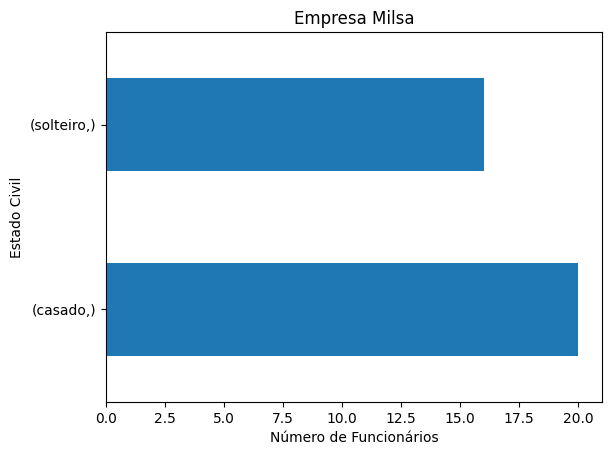

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#Gráfico da quantidade de funcionários por estado civil:
grafico_est_civil = df_milsa.loc(axis = 1)[['Est.civil']].value_counts().plot(kind="barh")
grafico_est_civil.set_title('Empresa Milsa')
grafico_est_civil.set_ylabel('Estado Civil')
grafico_est_civil.set_xlabel('Número de Funcionários')

Grafico de Pizza

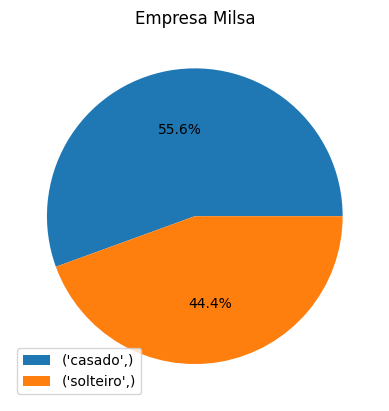

In [35]:
import matplotlib.pyplot as plt
import numpy as np

#x=[20,16]
#labels=['Casado','Solteiro']
x=df_milsa.loc(axis = 1)[['Est.civil']].value_counts()
labels=est_civil.index

fig, ax = plt.subplots()
ax.pie( x,autopct='%1.1f%%')
##ax.pie( x,labels=labels,autopct='%1.1f%%')

ax.set_title('Empresa Milsa')
ax.legend(labels)

In [36]:
moda = df_milsa['Est.civil'].mode()
print(moda)

0    casado
Name: Est.civil, dtype: object


### Variável: grau de instrução
variável qualitativa ordinal

Tabela de frequências para o atributo de grau de instrução (semelhante ao atributo de estado civil)

In [37]:
grau_inst = df_milsa.loc(axis = 1)[['Inst']].value_counts()
grau_inst

percentual = df_milsa.loc(axis = 1)[['Inst']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': grau_inst, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

          Frequencia  Porcentagem(%)
Inst                                
2o Grau           18       50.000000
1o Grau           12       33.333333
Superior           6       16.666667
\begin{tabular}{lrr}
\hline
               &   Frequencia &   Porcentagem(%) \\
\hline
 ('2o Grau',)  &           18 &          50      \\
 ('1o Grau',)  &           12 &          33.3333 \\
 ('Superior',) &            6 &          16.6667 \\
\hline
\end{tabular}


In [38]:
moda = df_milsa['Inst'].mode()
print(moda)

0    2o Grau
Name: Inst, dtype: object


In [39]:
n_filhos = df_milsa.loc(axis = 1)[['Filhos']].value_counts()

percentual = df_milsa.loc(axis = 1)[['Filhos']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': n_filhos, 'Porcentagem(%)': percentual})
# print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

\begin{tabular}{lrr}
\hline
        &   Frequencia &   Porcentagem(%) \\
\hline
 (0.0,) &           20 &         55.5556  \\
 (2.0,) &            7 &         19.4444  \\
 (1.0,) &            5 &         13.8889  \\
 (3.0,) &            3 &          8.33333 \\
 (5.0,) &            1 &          2.77778 \\
\hline
\end{tabular}


In [40]:
media = df_milsa.loc(axis = 1)[['Filhos']].mean()
moda = df_milsa.loc(axis = 1)[['Filhos']].mode()
mediana = df_milsa.loc(axis = 1)[['Filhos']].median()
desv_pad = df_milsa.loc(axis = 1)[['Filhos']].std()
variancia = df_milsa.loc(axis = 1)[['Filhos']].var()
amplitude = df_milsa.loc(axis = 1)[['Filhos']].max() - df_milsa.loc(axis = 1)[['Filhos']].min()
coef_var = desv_pad / media

print("media = ", media)
print("moda = ", moda)
print("mediana = ", mediana)
print("desvio padrao = ", desv_pad)
print("variancia = ", variancia)
print("amplitude = ", amplitude)
print("coeficiente de variância = ", coef_var)

media =  Filhos    0.916667
dtype: float64
moda =     Filhos
0     0.0
mediana =  Filhos    0.0
dtype: float64
desvio padrao =  Filhos    1.250714
dtype: float64
variancia =  Filhos    1.564286
dtype: float64
amplitude =  Filhos    5.0
dtype: float64
coeficiente de variância =  Filhos    1.364415
dtype: float64


Text(0.5, 0, 'Número de Funcionários')

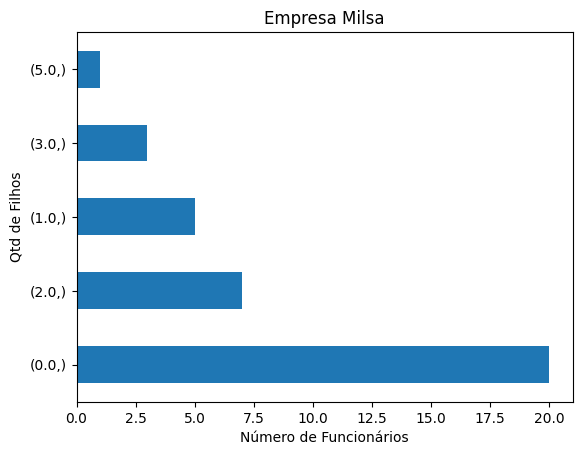

In [41]:
#Gráfico da quantidade de funcionários por estado civil:
grafico_filhos = df_milsa.loc(axis = 1)[['Filhos']].value_counts().plot(kind="barh")
grafico_filhos.set_title('Empresa Milsa')
grafico_filhos.set_ylabel('Qtd de Filhos')
grafico_filhos.set_xlabel('Número de Funcionários')

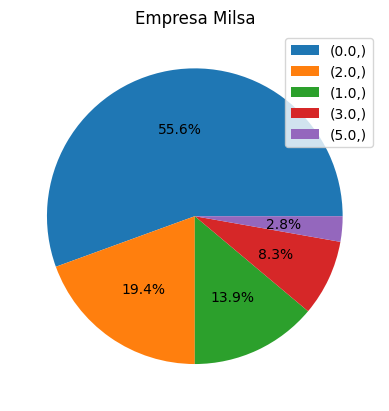

In [42]:
x=df_milsa.loc(axis = 1)[['Filhos']].value_counts()
labels=n_filhos.index

fig, ax = plt.subplots()
ax.pie( x,autopct='%1.1f%%')
##ax.pie( x,labels=labels,autopct='%1.1f%%')

ax.set_title('Empresa Milsa')
ax.legend(labels)

# Variável Quantitativa Contínua

### Variável: salário

Tabela de distribuição de frequencia

In [43]:
# dados milsa - salário
df_salario=df_milsa['Salario']
df_salario.sort_values(ascending=True)


Funcionario
1      4.00
2      4.56
3      5.25
4      5.73
5      6.26
6      6.66
7      6.86
8      7.39
10     7.44
9      7.59
11     8.12
12     8.46
13     8.74
14     8.95
15     9.13
16     9.35
17     9.77
18     9.80
19    10.53
20    10.76
21    11.06
22    11.59
23    12.00
24    12.79
25    13.23
26    13.60
27    13.85
28    14.69
29    14.71
30    15.99
31    16.22
32    16.61
33    17.26
34    18.75
35    19.40
36    23.30
Name: Salario, dtype: float64

In [44]:
import pandas as pd
import math

menors = df_salario.min()
maiors = df_salario.max()
print("O menor salário é: ", menors)
print("O maior salário é: ", maiors)

# Amplitude dos dados : maior maior dos registros menos menor valor
at = df_salario.max() - df_salario.min()
print('at',at)

# k = raiz quadrada do total de registros/amostras
k = math.sqrt(len(df_salario))
print('k',k)

# O valor de amplitude de classe pode ser arredondado para um número inteiro, geralmente para facilitar a interpretação da tabela.
h = at/k
h = math.ceil(h)
print('h',h)

O menor salário é:  4.0
O maior salário é:  23.3
at 19.3
k 6.0
h 4


In [45]:
#Tabela de Frequencia

# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Salario'])

# Definir os intervalos de classe
#informando a variação das classes (bins)- pd.cut(aberto no limite inferior)
dfs['Intervalo de Classe'] = pd.cut(dfs['Salario'], bins=range(0, 28, 4))

# Cria a tabela de distribuição de frequências (contagem)
tabela_freq = dfs['Intervalo de Classe'].value_counts(sort=False)

#print(tabela_freq)

# Organiza os intervalos de classe em ordem crescente
tabela_freq = tabela_freq.sort_index()

# Calcula as frequências relativas
tabela_freq_relativa = tabela_freq / tabela_freq.sum()

# Calcula as frequências acumuladas
tabela_freq_acumulada = tabela_freq.cumsum()

# Combina todas as informações em uma tabela
tabela_final = pd.DataFrame({
    'Frequência': tabela_freq,
    'Frequência Relativa': tabela_freq_relativa,
    'Frequência Acumulada': tabela_freq_acumulada
})

latex_code = tabulate(tabela_final, headers='keys', tablefmt='latex_raw')
print(latex_code)

\begin{tabular}{lrrr}
\hline
 Intervalo de Classe   &   Frequência &   Frequência Relativa &   Frequência Acumulada \\
\hline
 (0, 4]                &            1 &             0.0277778 &                      1 \\
 (4, 8]                &            9 &             0.25      &                     10 \\
 (8, 12]               &           13 &             0.361111  &                     23 \\
 (12, 16]              &            7 &             0.194444  &                     30 \\
 (16, 20]              &            5 &             0.138889  &                     35 \\
 (20, 24]              &            1 &             0.0277778 &                     36 \\
\hline
\end{tabular}


Para calcular a moda de dados agrupados, consideramos 
M = l(i) + ('f(i) / ('f(i)) + f'(i)) * h
Neste caso, de acordo com a tabela de frequências temos que a classe com maior frequência é (8, 12]. Logo:
- l(i) = 8
- 'f(i) = 9
- f'(i) = 7
- h = 4

Com estes valores, temos que M = 10.25.

In [46]:
# calculo da moda salarial (dados agrupados)

max_index_interval = tabela_final['Frequência'].idxmax()
max_position = tabela_final.index.get_loc(max_index_interval)
prev_position = max_position - 1
next_position = max_position + 1
li = max_index_interval.left
lfi = tabela_final.iloc[prev_position]['Frequência']
fli = tabela_final.iloc[next_position]['Frequência']
h = max_index_interval.length
moda_salario = li + (lfi/(lfi + fli)) * h
print("moda = ", moda_salario)


media_salario = df_salario.mean()
mediana_salario = df_salario.median()
variancia_salario = df_salario.var()
desvpad_salario = df_salario.std()
coefvar_salario = desvpad_salario / media_salario
print("mediana = ", mediana_salario)
print("variancia = ", variancia_salario)
print("coeficiente de variação = ", coefvar_salario)
df_salario.describe()

moda =  10.25
mediana =  10.165
variancia =  21.044766349206352
coeficiente de variação =  0.4124587166257218


count    36.000000
mean     11.122222
std       4.587458
min       4.000000
25%       7.552500
50%      10.165000
75%      14.060000
max      23.300000
Name: Salario, dtype: float64

In [47]:
# calculo dos coeficientes de assimetria
# 1o coeficiente de pearson
p_coef_pearson = (media_salario - moda_salario) / desvpad_salario
print("1º coeficiente de Pearson = ", p_coef_pearson)
if(p_coef_pearson == 0):
    print("Distribuição simétrica")
elif(p_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")


# 2o coeficiente de pearson
q1 = df_salario.quantile(0.25)
q2 = df_salario.quantile(0.50)
q3 = df_salario.quantile(0.75)
s_coef_pearson = (q3 + q1 - 2 *mediana_salario) / (q3 - q1)
print("2º coeficiente de Pearson = ", s_coef_pearson)
if(s_coef_pearson == 0):
    print("Distribuição simétrica")
elif(s_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")

1º coeficiente de Pearson =  0.1901319459633111
Distribuição assimétrica positiva
2º coeficiente de Pearson =  0.1970802919708028
Distribuição assimétrica positiva


In [48]:
# coeficiente de curtose / achatamento
p90 = df_salario.quantile(0.9)
p10 = df_salario.quantile(0.1)
curtose = (q3 - q1) / (2*(p90 - p10))
# print(df_salario.kurt())
print("Coeficiente de Curtose = ", curtose)
if(curtose == 0.263):
    print("A curva é mesocúrtica")
elif(curtose < 0.263):
    print("A curva é letocúrtica")
else:
    print("A curva é platicúrtica")

Coeficiente de Curtose =  0.2974177330895794
A curva é platicúrtica


Histograma e Box-plot

Construindo histograma com Matplotlib

Text(0.5, 1.0, 'Histograma da variável salário')

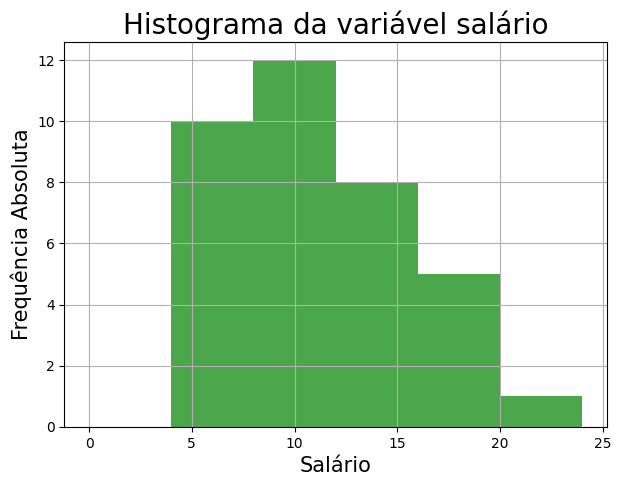

In [49]:
df_milsa['Salario'].hist(bins=range(0, 28, 4), figsize = (7,5), color='green',alpha=0.7)
plt.xlabel('Salário', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.title('Histograma da variável salário', fontsize=20)



<Axes: title={'center': 'Boxplot da variável salário'}>

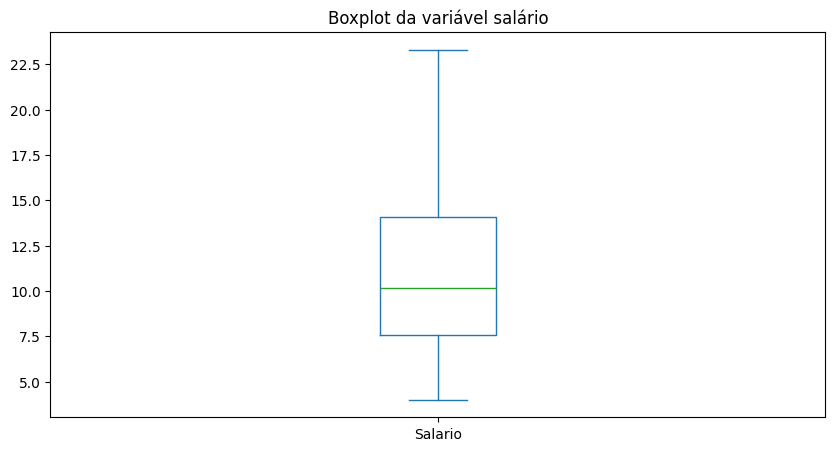

In [50]:
#blox-plot do salario
plt.figure(figsize = (10, 5))
df_milsa['Salario'].plot(kind='box', title='Boxplot da variável salário')

## Variável Idade (anos)
variável quantitativa discreta

Primeiro gerando a tabela de frequência sem agrupar os dados

In [51]:
idade = df_milsa['Anos'].value_counts().sort_values()
idade

percentual = df_milsa['Anos'].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': idade, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

      Frequencia  Porcentagem(%)
Anos                            
20             1        2.777778
23             1        2.777778
25             1        2.777778
26             2        5.555556
27             1        2.777778
28             1        2.777778
29             1        2.777778
30             2        5.555556
31             2        5.555556
32             2        5.555556
33             2        5.555556
34             2        5.555556
35             2        5.555556
36             2        5.555556
37             2        5.555556
38             1        2.777778
39             1        2.777778
40             2        5.555556
41             2        5.555556
42             1        2.777778
43             2        5.555556
44             1        2.777778
46             1        2.777778
48             1        2.777778
\begin{tabular}{rrr}
\hline
   Anos &   Frequencia &   Porcentagem(%) \\
\hline
     20 &            1 &          2.77778 \\
     23 &        

Agora com agrupamento de dados

In [52]:
#Tabela de Frequencia

# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Anos'])

limite_superior = dfs['Anos'].max() + 4
limite_inferior = dfs['Anos'].min() - 4

# Definir os intervalos de classe
#informando a variação das classes (bins)- pd.cut(aberto no limite inferior)
dfs['Intervalo de Classe'] = pd.cut(dfs['Anos'], bins=range(limite_inferior, limite_superior, 4))

# Cria a tabela de distribuição de frequências (contagem)
tabela_freq = dfs['Intervalo de Classe'].value_counts(sort=False)

#print(tabela_freq)

# Organiza os intervalos de classe em ordem crescente
tabela_freq = tabela_freq.sort_index()

# Calcula as frequências relativas
tabela_freq_relativa = tabela_freq / tabela_freq.sum()

# Calcula as frequências acumuladas
tabela_freq_acumulada = tabela_freq.cumsum()

# Combina todas as informações em uma tabela
tabela_final = pd.DataFrame({
    'Frequência': tabela_freq,
    'Frequência Relativa': tabela_freq_relativa,
    'Frequência Acumulada': tabela_freq_acumulada
})

latex_code = tabulate(tabela_final, headers='keys', tablefmt='latex_raw')
print(latex_code)


\begin{tabular}{lrrr}
\hline
 Intervalo de Classe   &   Frequência &   Frequência Relativa &   Frequência Acumulada \\
\hline
 (16, 20]              &            1 &             0.0277778 &                      1 \\
 (20, 24]              &            1 &             0.0277778 &                      2 \\
 (24, 28]              &            5 &             0.138889  &                      7 \\
 (28, 32]              &            7 &             0.194444  &                     14 \\
 (32, 36]              &            8 &             0.222222  &                     22 \\
 (36, 40]              &            6 &             0.166667  &                     28 \\
 (40, 44]              &            6 &             0.166667  &                     34 \\
 (44, 48]              &            2 &             0.0555556 &                     36 \\
\hline
\end{tabular}


Medidas de tendência central

In [53]:
# calculo da moda de idade (dados agrupados)

max_index_interval = tabela_final['Frequência'].idxmax()
max_position = tabela_final.index.get_loc(max_index_interval)
prev_position = max_position - 1
next_position = max_position + 1
li = max_index_interval.left
lfi = tabela_final.iloc[prev_position]['Frequência']
fli = tabela_final.iloc[next_position]['Frequência']
h = max_index_interval.length
moda_idade = li + (lfi/(lfi + fli)) * h
print("moda = ", moda_salario)

df_idade=df_milsa['Anos']
df_idade.sort_values(ascending=True)

media_idade = df_idade.mean()
mediana_idade = df_idade.median()
variancia_idade = df_idade.var()
desvpad_idade = df_idade.std()
coefvar_idade = desvpad_idade / media_idade
print("mediana = ", mediana_idade)
print("variancia = ", variancia_idade)
print("coeficiente de variação = ", coefvar_idade)
print("media = ", media_idade)
df_idade.describe()

moda =  10.25
mediana =  34.5
variancia =  45.392857142857146
coeficiente de variação =  0.1948170258428677
media =  34.583333333333336


count    36.000000
mean     34.583333
std       6.737422
min      20.000000
25%      30.000000
50%      34.500000
75%      40.000000
max      48.000000
Name: Anos, dtype: float64

Coeficiente de assimetria e curtose

In [54]:
# calculo dos coeficientes de assimetria
# 1o coeficiente de pearson
p_coef_pearson = (media_idade - moda_idade) / desvpad_idade
print("1º coeficiente de Pearson = ", p_coef_pearson)
if(p_coef_pearson == 0):
    print("Distribuição simétrica")
elif(p_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")


# 2o coeficiente de pearson
q1 = df_idade.quantile(0.25)
q2 = df_idade.quantile(0.50)
q3 = df_idade.quantile(0.75)
s_coef_pearson = (q3 + q1 - 2 *mediana_idade) / (q3 - q1)
print("2º coeficiente de Pearson = ", s_coef_pearson)
if(s_coef_pearson == 0):
    print("Distribuição simétrica")
elif(s_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")

1º coeficiente de Pearson =  0.06374651466462038
Distribuição assimétrica positiva
2º coeficiente de Pearson =  0.1
Distribuição assimétrica positiva


In [56]:
# coeficiente de curtose / achatamento
p90 = df_idade.quantile(0.9)
p10 = df_idade.quantile(0.1)
curtose = (q3 - q1) / (2*(p90 - p10))
# print(df_salario.kurt())
print("Coeficiente de Curtose = ", curtose)
if(curtose == 0.263):
    print("A curva é mesocúrtica")
elif(curtose < 0.263):
    print("A curva é letocúrtica")
else:
    print("A curva é platicúrtica")

Coeficiente de Curtose =  0.29411764705882354
A curva é platicúrtica


Histograma e Box-Plot


Text(0.5, 1.0, 'Histograma da variável idade (anos)')

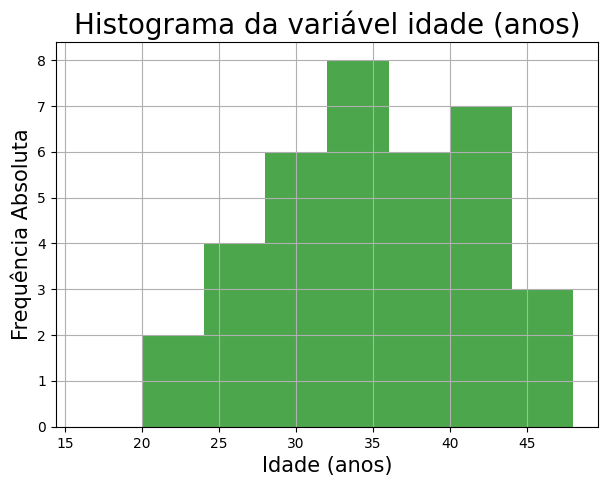

In [43]:
inferior = df_milsa['Anos'].min() - 4
superior = df_milsa['Anos'].max() + 4
df_milsa['Anos'].hist(bins=range(inferior, superior, 4), figsize = (7,5), color='green',alpha=0.7)
plt.xlabel('Idade (anos)', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.title('Histograma da variável idade (anos)', fontsize=20)



<Axes: title={'center': 'Boxplot da variável idade (anos)'}>

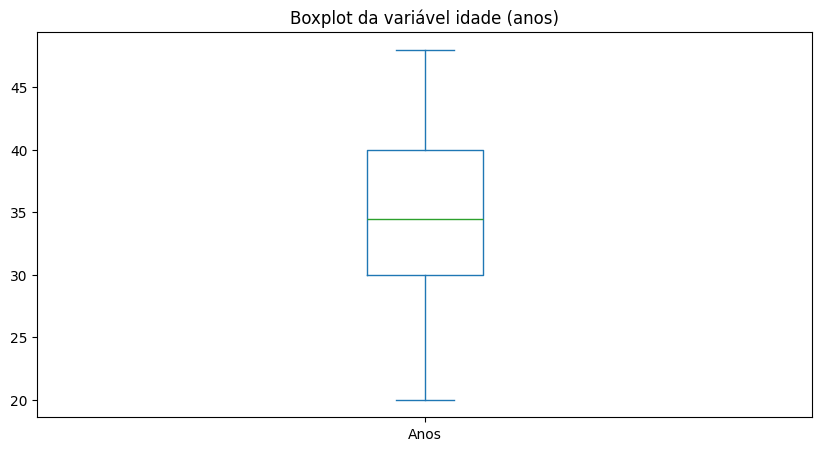

In [44]:
#blox-plot da idade
plt.figure(figsize = (10, 5))
df_milsa['Anos'].plot(kind='box', title='Boxplot da variável idade (anos)')

## Variável Região

variável qualitativa nominal

Tabela de Frequências

In [45]:
#Quantidade de funcionários por regiao (frequencia absoluta):
regiao = df_milsa.loc(axis = 1)[['Regiao']].value_counts()

regiao_relativa = df_milsa.loc(axis = 1)[['Regiao']].value_counts(normalize=True)
dist_freq_relat = pd.DataFrame({'Frequencia': regiao})
print(dist_freq_relat)

# Gerar código LaTeX
latex_code = tabulate(dist_freq_relat, headers='keys', tablefmt='latex_raw')

print(latex_code)

percentual = df_milsa.loc(axis = 1)[['Regiao']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': regiao, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

          Frequencia
Regiao              
outro             13
interior          12
capital           11
\begin{tabular}{lr}
\hline
               &   Frequencia \\
\hline
 ('outro',)    &           13 \\
 ('interior',) &           12 \\
 ('capital',)  &           11 \\
\hline
\end{tabular}
          Frequencia  Porcentagem(%)
Regiao                              
outro             13       36.111111
interior          12       33.333333
capital           11       30.555556
\begin{tabular}{lrr}
\hline
               &   Frequencia &   Porcentagem(%) \\
\hline
 ('outro',)    &           13 &          36.1111 \\
 ('interior',) &           12 &          33.3333 \\
 ('capital',)  &           11 &          30.5556 \\
\hline
\end{tabular}


Gráfico de barras


Text(0.5, 0, 'Número de Funcionários')

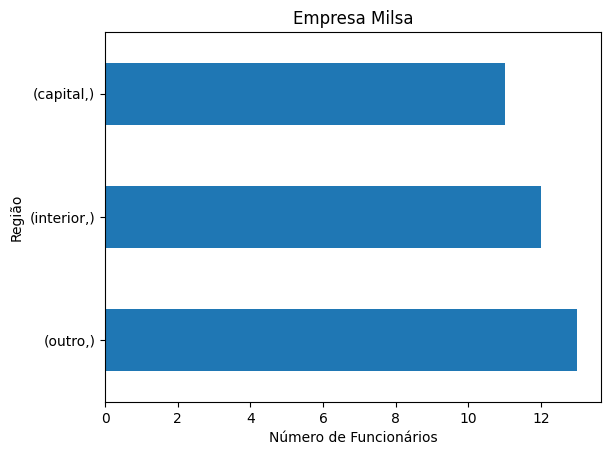

In [46]:
#Gráfico da quantidade de funcionários por regiao:
grafico_est_civil = df_milsa.loc(axis = 1)[['Regiao']].value_counts().plot(kind="barh")
grafico_est_civil.set_title('Empresa Milsa')
grafico_est_civil.set_ylabel('Região')
grafico_est_civil.set_xlabel('Número de Funcionários')

Moda de região

In [47]:
moda_regiao = df_milsa['Regiao'].mode()
print(moda_regiao)

0    outro
Name: Regiao, dtype: object


### Questões (análise univariada)
- Quantos funcionários tem curso superior?

In [48]:
contagem_inst = df_milsa['Inst'].value_counts()
qtd_sup = contagem_inst.get('Superior', 0)
print(qtd_sup)

6


- O que se pode afirmar sobre a região de procedência? (A maioria vem do interior? Ou da Capital? Ou outros?)

In [49]:
moda_regiao = df_milsa['Regiao'].mode()
print(moda_regiao)

0    outro
Name: Regiao, dtype: object


- Quantos funcionários possuem salário superior a 8 salários mínimos?

In [57]:
sal_minimo8 = 12.144
count_sal_min = (df_milsa['Salario'] > sal_minimo8).sum()
print(count_sal_min)

13


- Mais do que 60% dos funcionários estão em que faixa etária? 

In [51]:
inferior_idade = df_milsa['Anos'].min() - 4
superior_idade = df_milsa['Anos'].max() + 4
bins = range(int(inferior_idade), int(superior_idade))

idade_agrupada = pd.cut(df_milsa['Anos'], bins=bins)
freq = idade_agrupada.value_counts(sort=False)
porcentagem = freq / freq.sum() * 100
pct_acumulada = porcentagem.cumsum()

fit = pct_acumulada[pct_acumulada >= 60]
if not fit.empty:
    primeira_faixa = fit.index[0]
    valor_acumulado = fit.iloc[0]
    print(primeira_faixa)
    print(valor_acumulado)

(35, 36]
61.11111111111112


# Análise Bivariada

#### Considerando primeiro **Estado Civil X Grau de Instrução**

Tabela de frequências absolutas

In [52]:
cruz_civil_inst = pd.crosstab(df_milsa['Est.civil'], df_milsa['Inst'])
print(cruz_civil_inst)

latex_code = tabulate(cruz_civil_inst, headers='keys', tablefmt='latex_raw')
print(latex_code)

Inst       1o Grau  2o Grau  Superior
Est.civil                            
casado           5       12         3
solteiro         7        6         3
\begin{tabular}{lrrr}
\hline
 Est.civil   &   1o Grau &   2o Grau &   Superior \\
\hline
 casado      &         5 &        12 &          3 \\
 solteiro    &         7 &         6 &          3 \\
\hline
\end{tabular}


Tabela de frequências relativas

In [53]:
cruz_civil_inst_abs = pd.crosstab(df_milsa['Est.civil'], df_milsa['Inst'], normalize=True)
print(cruz_civil_inst_abs)

latex_code = tabulate(cruz_civil_inst_abs, headers='keys', tablefmt='latex_raw')
print(latex_code)

Inst        1o Grau   2o Grau  Superior
Est.civil                              
casado     0.138889  0.333333  0.083333
solteiro   0.194444  0.166667  0.083333
\begin{tabular}{lrrr}
\hline
 Est.civil   &   1o Grau &   2o Grau &   Superior \\
\hline
 casado      &  0.138889 &  0.333333 &  0.0833333 \\
 solteiro    &  0.194444 &  0.166667 &  0.0833333 \\
\hline
\end{tabular}


Gráfico de barras

Text(0, 0.5, 'Qtd de Funcionários')

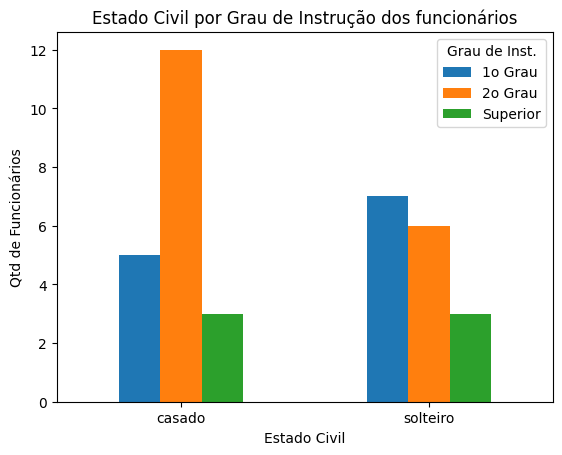

In [54]:
cruz_civil_inst.plot(kind='bar', stacked=False, rot=0)
plt.title('Estado Civil por Grau de Instrução dos funcionários')
plt.legend(title='Grau de Inst.')
plt.xlabel('Estado Civil')
plt.ylabel('Qtd de Funcionários')

#### Considerando **Salário X Grau de Instrução**

Tabela de frequências absolutas

In [96]:
# primeiro, agrupar os dados de salario
# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Salario'])

# Definir os intervalos de classe
#informando a variação das classes (bins)- pd.cut(aberto no limite inferior)
dfs['Intervalo de Salario'] = pd.cut(dfs['Salario'], bins=range(0, 28, 4))

cruz_sal_inst = pd.crosstab(dfs['Intervalo de Salario'], df_milsa['Inst'])
print(cruz_sal_inst)

latex_code = tabulate(cruz_sal_inst, headers='keys', tablefmt='latex_raw')
print(latex_code)

Inst                  1o Grau  2o Grau  Superior
Intervalo de Salario                            
(0, 4]                      1        0         0
(4, 8]                      6        3         0
(8, 12]                     4        8         1
(12, 16]                    1        5         1
(16, 20]                    0        2         3
(20, 24]                    0        0         1
\begin{tabular}{lrrr}
\hline
 Intervalo de Salario   &   1o Grau &   2o Grau &   Superior \\
\hline
 (0, 4]                 &         1 &         0 &          0 \\
 (4, 8]                 &         6 &         3 &          0 \\
 (8, 12]                &         4 &         8 &          1 \\
 (12, 16]               &         1 &         5 &          1 \\
 (16, 20]               &         0 &         2 &          3 \\
 (20, 24]               &         0 &         0 &          1 \\
\hline
\end{tabular}


Tabela de frequências relativas

In [97]:
cruz_sal_inst_abs = pd.crosstab(dfs['Intervalo de Salario'], df_milsa['Inst'], normalize=True)
print(cruz_sal_inst_abs)

latex_code = tabulate(cruz_sal_inst_abs, headers='keys', tablefmt='latex_raw')
print(latex_code)

Inst                   1o Grau   2o Grau  Superior
Intervalo de Salario                              
(0, 4]                0.027778  0.000000  0.000000
(4, 8]                0.166667  0.083333  0.000000
(8, 12]               0.111111  0.222222  0.027778
(12, 16]              0.027778  0.138889  0.027778
(16, 20]              0.000000  0.055556  0.083333
(20, 24]              0.000000  0.000000  0.027778
\begin{tabular}{lrrr}
\hline
 Intervalo de Salario   &   1o Grau &   2o Grau &   Superior \\
\hline
 (0, 4]                 & 0.0277778 & 0         &  0         \\
 (4, 8]                 & 0.166667  & 0.0833333 &  0         \\
 (8, 12]                & 0.111111  & 0.222222  &  0.0277778 \\
 (12, 16]               & 0.0277778 & 0.138889  &  0.0277778 \\
 (16, 20]               & 0         & 0.0555556 &  0.0833333 \\
 (20, 24]               & 0         & 0         &  0.0277778 \\
\hline
\end{tabular}


Boxplot do salário X grau de instrução

/tmp/ipykernel_30789/2838613034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Inst', y='Salario', data=df_milsa, palette='pastel')


Text(0, 0.5, 'Salario')

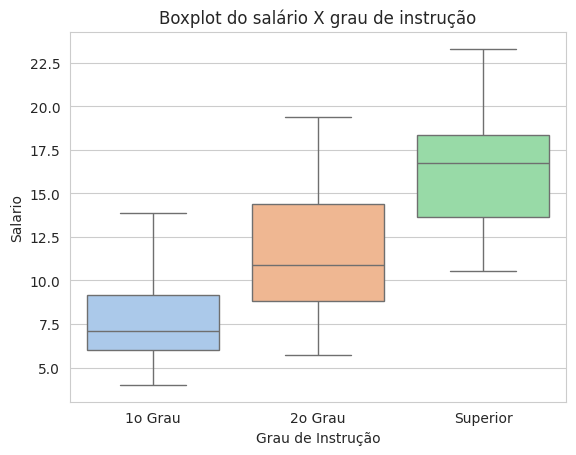

In [116]:
import seaborn as sns

# df_milsa.plot(kind='box', x='Inst', y='Salario')
sns.boxplot(x='Inst', y='Salario', data=df_milsa, palette='pastel')
plt.title('Boxplot do salário X grau de instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Salario')

Média, desvio padrão e resumo de cinco números do salário para cada nível de instrução

In [88]:
# Estatísticas por grau de instrução: média, desvio-padrão e resumo (5 números)
stats_inst = df_milsa.groupby('Inst')['Salario'].agg(
    count='count',
    media=lambda x: x.mean(),
    desvio_padrao=lambda x: x.std(),
    minimo=lambda x: x.min(),
    q1=lambda x: x.quantile(0.25),
    mediana=lambda x: x.median(),
    q3=lambda x: x.quantile(0.75),
    maximo=lambda x: x.max()
).round(2)

print(stats_inst)


          count  media  desvio_padrao  minimo     q1  mediana     q3  maximo
Inst                                                                        
1o Grau      12   7.84           2.96    4.00   6.01     7.12   9.16   13.85
2o Grau      18  11.53           3.72    5.73   8.84    10.91  14.42   19.40
Superior      6  16.47           4.50   10.53  13.65    16.74  18.38   23.30


#### Considerando as variáveis **Salário x Idade**

Tabela de contingência (cruzada)

In [103]:
df_idade = pd.DataFrame(df_milsa, columns=['Anos'])
inferior_idade = df_milsa['Anos'].min() - 2
superior_idade = df_milsa['Anos'].max() + 1
bins = range(int(inferior_idade), int(superior_idade), 6)
# Definir os intervalos de classe
#informando a variação das classes (bins)- pd.cut(aberto no limite inferior)
df_idade['Intervalo de Idade'] = pd.cut(df_idade['Anos'], bins=bins)

cruz_sal_idade = pd.crosstab(dfs['Intervalo de Salario'], df_idade['Intervalo de Idade'])
print(cruz_sal_idade)

latex_code = tabulate(cruz_sal_idade, headers='keys', tablefmt='latex_raw')
print(latex_code)

Intervalo de Idade    (18, 24]  (24, 30]  (30, 36]  (36, 42]  (42, 48]
Intervalo de Salario                                                  
(0, 4]                       0         1         0         0         0
(4, 8]                       2         1         3         2         1
(8, 12]                      0         4         3         5         1
(12, 16]                     0         2         3         1         1
(16, 20]                     0         0         3         0         2
(20, 24]                     0         0         0         1         0
\begin{tabular}{lrrrrr}
\hline
 Intervalo de Salario   &   (18, 24] &   (24, 30] &   (30, 36] &   (36, 42] &   (42, 48] \\
\hline
 (0, 4]                 &          0 &          1 &          0 &          0 &          0 \\
 (4, 8]                 &          2 &          1 &          3 &          2 &          1 \\
 (8, 12]                &          0 &          4 &          3 &          5 &          1 \\
 (12, 16]               & 

Diagrama de dispersão

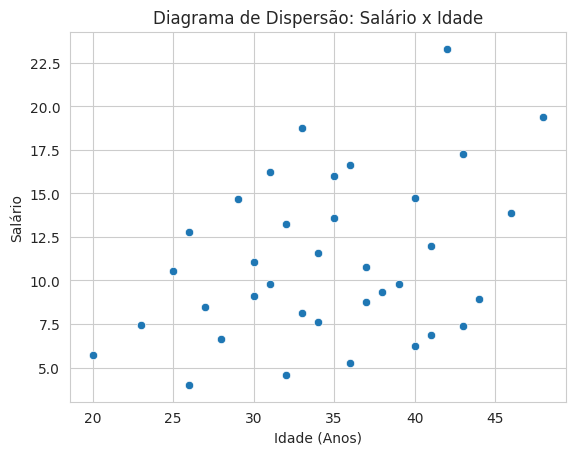

In [108]:
sns.scatterplot(x='Anos', y='Salario', data=df_milsa)
plt.title('Diagrama de Dispersão: Salário x Idade')
plt.xlabel('Idade (Anos)')
plt.ylabel('Salário')
plt.show()

#### Considerando as variáveis **Salário X Região**

Tabela de frequências absolutas

In [111]:
# primeiro, agrupar os dados de salario
# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Salario'])

# Definir os intervalos de classe
#informando a variação das classes (bins)- pd.cut(aberto no limite inferior)
dfs['Intervalo de Salario'] = pd.cut(dfs['Salario'], bins=range(0, 28, 4))

cruz_sal_reg = pd.crosstab(dfs['Intervalo de Salario'], df_milsa['Regiao'])
print(cruz_sal_reg)

latex_code = tabulate(cruz_sal_reg, headers='keys', tablefmt='latex_raw')
print(latex_code)

Regiao                capital  interior  outro
Intervalo de Salario                          
(0, 4]                      0         1      0
(4, 8]                      4         2      3
(8, 12]                     3         4      6
(12, 16]                    1         3      3
(16, 20]                    3         1      1
(20, 24]                    0         1      0
\begin{tabular}{lrrr}
\hline
 Intervalo de Salario   &   capital &   interior &   outro \\
\hline
 (0, 4]                 &         0 &          1 &       0 \\
 (4, 8]                 &         4 &          2 &       3 \\
 (8, 12]                &         3 &          4 &       6 \\
 (12, 16]               &         1 &          3 &       3 \\
 (16, 20]               &         3 &          1 &       1 \\
 (20, 24]               &         0 &          1 &       0 \\
\hline
\end{tabular}


Tabela de frequências relativas

In [112]:
cruz_sal_reg_abs = pd.crosstab(dfs['Intervalo de Salario'], df_milsa['Regiao'], normalize=True)
print(cruz_sal_reg_abs)

latex_code = tabulate(cruz_sal_reg_abs, headers='keys', tablefmt='latex_raw')
print(latex_code)

Regiao                 capital  interior     outro
Intervalo de Salario                              
(0, 4]                0.000000  0.027778  0.000000
(4, 8]                0.111111  0.055556  0.083333
(8, 12]               0.083333  0.111111  0.166667
(12, 16]              0.027778  0.083333  0.083333
(16, 20]              0.083333  0.027778  0.027778
(20, 24]              0.000000  0.027778  0.000000
\begin{tabular}{lrrr}
\hline
 Intervalo de Salario   &   capital &   interior &     outro \\
\hline
 (0, 4]                 & 0         &  0.0277778 & 0         \\
 (4, 8]                 & 0.111111  &  0.0555556 & 0.0833333 \\
 (8, 12]                & 0.0833333 &  0.111111  & 0.166667  \\
 (12, 16]               & 0.0277778 &  0.0833333 & 0.0833333 \\
 (16, 20]               & 0.0833333 &  0.0277778 & 0.0277778 \\
 (20, 24]               & 0         &  0.0277778 & 0         \\
\hline
\end{tabular}


Boxplot do salário X região

/tmp/ipykernel_30789/4009625141.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regiao', y='Salario', data=df_milsa, palette='pastel')


Text(0, 0.5, 'Salario')

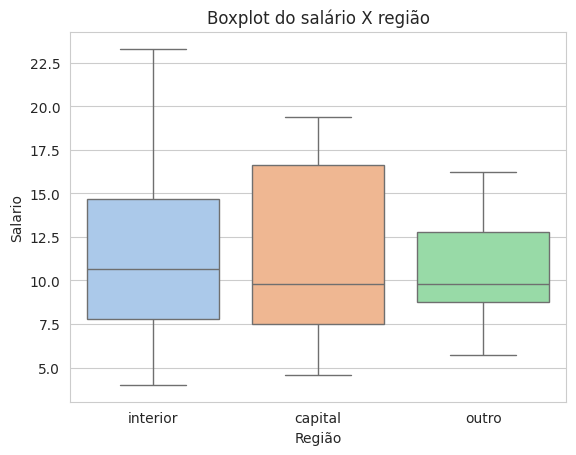

In [113]:
sns.boxplot(x='Regiao', y='Salario', data=df_milsa, palette='pastel')
plt.title('Boxplot do salário X região')
plt.xlabel('Região')
plt.ylabel('Salario')

Média, desvio padrão e resumo de cinco números do salário para cada região.

In [114]:
# Estatísticas por grau de instrução: média, desvio-padrão e resumo (5 números)
stats_inst = df_milsa.groupby('Regiao')['Salario'].agg(
    count='count',
    media=lambda x: x.mean(),
    desvio_padrao=lambda x: x.std(),
    minimo=lambda x: x.min(),
    q1=lambda x: x.quantile(0.25),
    mediana=lambda x: x.median(),
    q3=lambda x: x.quantile(0.75),
    maximo=lambda x: x.max()
).round(2)

print(stats_inst)

          count  media  desvio_padrao  minimo    q1  mediana     q3  maximo
Regiao                                                                     
capital      11  11.46           5.48    4.56  7.49     9.77  16.62   19.40
interior     12  11.55           5.30    4.00  7.80    10.64  14.70   23.30
outro        13  10.45           3.15    5.73  8.74     9.80  12.79   16.22


#### Considerando as variáveis **Salário X Número de Filhos**

Tabela de contingência

In [118]:
cruz_sal_filhos = pd.crosstab(dfs['Intervalo de Salario'], df_milsa['Filhos'])
print(cruz_sal_filhos)

latex_code = tabulate(cruz_sal_filhos, headers='keys', tablefmt='latex_raw')
print(latex_code)

Filhos                0.0  1.0  2.0  3.0  5.0
Intervalo de Salario                         
(0, 4]                  1    0    0    0    0
(4, 8]                  6    2    1    0    0
(8, 12]                 8    2    2    1    0
(12, 16]                3    0    3    0    1
(16, 20]                2    1    1    1    0
(20, 24]                0    0    0    1    0
\begin{tabular}{lrrrrr}
\hline
 Intervalo de Salario   &   0.0 &   1.0 &   2.0 &   3.0 &   5.0 \\
\hline
 (0, 4]                 &     1 &     0 &     0 &     0 &     0 \\
 (4, 8]                 &     6 &     2 &     1 &     0 &     0 \\
 (8, 12]                &     8 &     2 &     2 &     1 &     0 \\
 (12, 16]               &     3 &     0 &     3 &     0 &     1 \\
 (16, 20]               &     2 &     1 &     1 &     1 &     0 \\
 (20, 24]               &     0 &     0 &     0 &     1 &     0 \\
\hline
\end{tabular}


Diagrama de dispersão

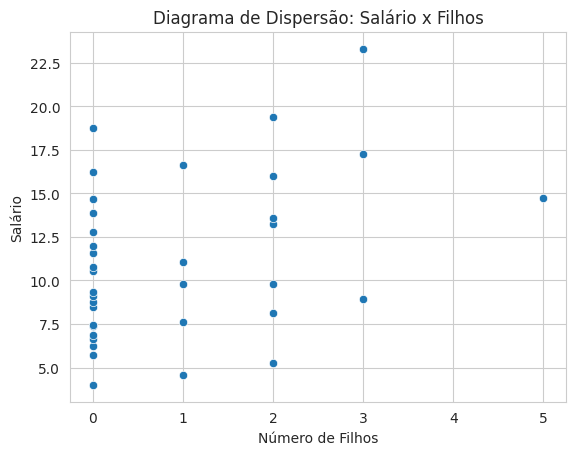

In [119]:
sns.scatterplot(x='Filhos', y='Salario', data=df_milsa)
plt.title('Diagrama de Dispersão: Salário x Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Salário')
plt.show()

Construindo histograma com Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

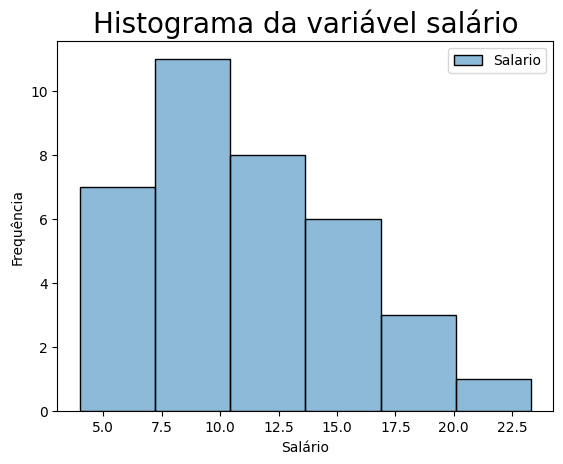

In [ ]:
#dados
# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Salario'])

# Criando o histograma com Seaborn
sns.histplot(dfs, bins=6, kde=False, color='green')
plt.title('Histograma da variável salário', fontsize=20)
plt.xlabel('Salário')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

# Medidas descritivas

In [ ]:
#carregar bibliotecas
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Estatistica dos dados

df_milsa.describe()

,Filhos,Salario,Anos,Meses
count,36.000000,36.000000,36.000000,36.000000
mean,0.916667,11.122222,34.583333,5.611111
std,1.250714,4.587458,6.737422,3.288749
min,0.000000,4.000000,20.000000,0.000000
25%,0.000000,7.552500,30.000000,3.750000
50%,0.000000,10.165000,34.500000,6.000000
75%,2.000000,14.060000,40.000000,8.000000
max,5.000000,23.300000,48.000000,11.000000


In [ ]:
#informações quanto aos dados
df_milsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 36
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Est.civil  36 non-null     object 
 1   Inst       36 non-null     object 
 2   Filhos     36 non-null     float64
 3   Salario    36 non-null     float64
 4   Anos       36 non-null     int64  
 5   Meses      36 non-null     int64  
 6   Regiao     36 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
import pandas as pd

#Calculo da média
mediasalario= df_milsa['Salario'].mean ()
print(mediasalario)

#Calculo da mediana
medianasalario= df_milsa['Salario'].median ()
print(medianasalario)

#calculo do desvio-padrao
desviosal=df_milsa['Salario'].std()
print(desviosal)


11.122222222222222
10.165
4.5874575038038605


<Axes: >

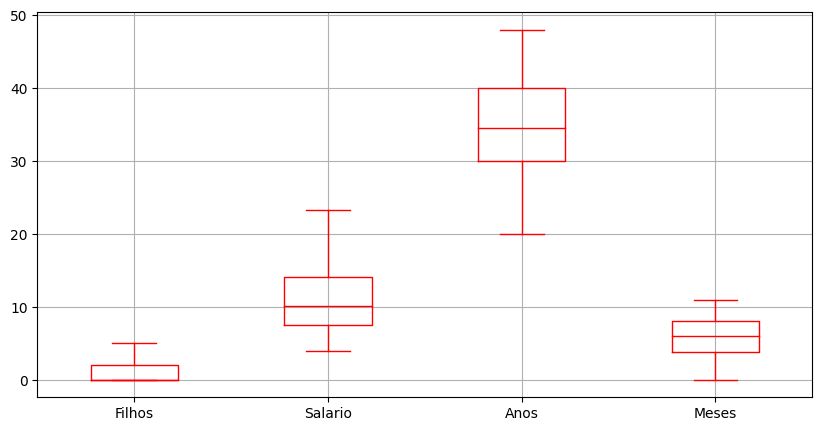

In [ ]:
#blox-plot
plt.figure(figsize = (10, 5))
df_milsa.boxplot(color='red')
